# The `analosis` package

**Author**: Natalie B. Hogg

The `analosis` (`analysis` + `los`) package allows us to perform various analyses of the line-of-sight effects using `lenstronomy` while maintaining the same settings across the board. 

**Warning**: in reality this means many parameter choices are hard-coded inside `analosis`. 

This notebook provides the interface with the `analosis` package, allowing you to choose what type of lensing scenario to analyse and to save the results to your machine.

In [1]:
# set the path to analosis relative to this notebook
import sys
sys.path.append('../..')

# import the Run class which allows you to run the analysis of your choice
from analosis.run import Run

### Cosmology
Choose the cosmological parameters which will be used by `lenstronomy`, `astropy` and `colossus` (for halo mass functions). The `id` must match one of those known to `colossus`: https://bdiemer.bitbucket.io/colossus/cosmology_cosmology.html#standard-cosmologies.

### Scenario
Choose the scenario you want to analyse.

Options:
* `composite lens`
* `distributed haloes`

### Complexity
Set the model complexity: you can choose to fit the generated image with a perfect model, a perfect minimal model, or a variety of incomplete minimal models. **This choice is only relevant for the composite lens**. It will be ignored if you run the distributed haloes scenario.

Options:
* `perfect`: fits the generated image with a model consisting of `main lens` + `halo` + `LOS`
* `perfect minimal`: fits the generated image with a model consisting of `main lens` + `halo`+ `LOS MINIMAL`
* `missing halo`: fits the generated image with a model consisting of `main lens` +  `LOS MINIMAL`
* `missing offset`: fits the generated image with a model consisting of `main lens` + `halo` + `LOS MINIMAL`, with the halo centre fixed to zero
* `missing ellipticity`: fits the generated image with a model consisting of `main lens` + `halo` + `LOS MINIMAL`, with the halo ellipticity fixed to zero

### Number of runs
Choose the number of runs you want to do i.e. how many images will be created and fit.

### Parameters
Other parameters.

In [2]:
cosmology = {'id': 'planck18', 'H0': 67.4, 'Om': 0.315}

settings = {'scenario': 'composite lens',
            'complexity': 'perfect minimal',
            'lens_light': False,
            'number_of_images': 3,
            'MCMC': True,
            'job_name': 'test',
            'n_burn': 1,
            'n_run': 1}

parameters = {'maximum_shear': 0.03,
              'Einstein_radius_min': 0.5, # arcsec
              'maximum_source_offset_factor': 1,
              'sigma_halo_offset': 300} # pc

### Run
Finally, run the analysis. Note that you don't need to specify a path where you want your results to be saved: `analosis` automatically saves everything to a dedicated results directory. **Please don't push the contents of this directory to github!** (There is a .gitignore in place to prevent this, so you shouldn't have to worry about doing it accidentally).

In [3]:
result = Run(cosmology, settings, parameters)

Running the composite lens case with the following settings:

Model: perfect minimal
Number of runs: 3
Lens light: False
Starting MCMC


100%|██████████| 2/2 [00:00<00:00,  2.44it/s]


Computing the MCMC...
Number of walkers =  220
Burn-in iterations:  1
Sampling iterations (in current run): 2
1.3896186351776123 time taken for MCMC sampling
the number of walkers in this chain is 220
Starting MCMC


100%|██████████| 2/2 [00:01<00:00,  1.98it/s]


Computing the MCMC...
Number of walkers =  220
Burn-in iterations:  1
Sampling iterations (in current run): 2
1.6629810333251953 time taken for MCMC sampling
the number of walkers in this chain is 220
Starting MCMC


100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

Computing the MCMC...
Number of walkers =  220
Burn-in iterations:  1
Sampling iterations (in current run): 2
1.5827221870422363 time taken for MCMC sampling
the number of walkers in this chain is 220

Analysis complete and results saved at /home/natalie/Documents/Projects/los_effects/analosis/analosis/results.


In [3]:
from analosis.analysis.plots import Plots
p = Plots()
path = result.pathfinder()

NameError: name 'result' is not defined

### Image plot

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


Preparing image plot...


../../analosis/analysis/plots.py:68: RuntimeWarning: invalid value encountered in log10
  im = ax.matshow(np.log10(image_list[n]), origin='lower', vmin=v_min, vmax=v_max, cmap=cmap, extent=[0, 1, 0, 1])


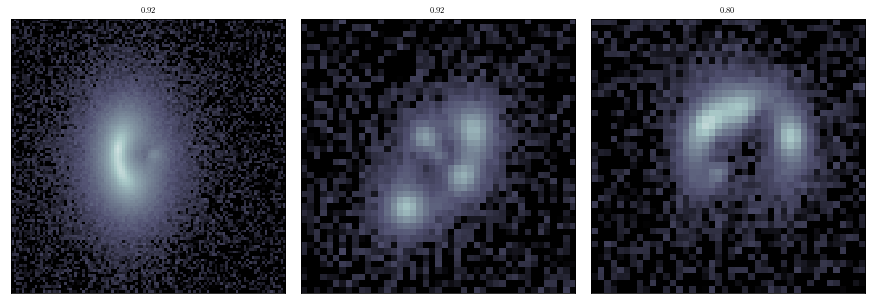

In [5]:
p.image_plot(path, settings, number_of_columns=3)

### Input vs output plot

In [2]:
p.input_output_plot(path, settings, show_not_converged=True)

NameError: name 'p' is not defined

## Examine the results

In [7]:
import pandas as pd
path = '/Users/pierrefleury/GitHub/analosis/analosis/results/datasets/'
kwargs = pd.read_csv(path + '/input_kwargs.csv')
kwargs

,R_sersic_bar,n_sersic_bar,k_eff_bar,e1_bar,e2_bar,x_bar,y_bar,Rs,alpha_Rs,x_nfw,...,x_ll,y_ll,amp_ll,amp_sl,R_sersic_sl,n_sersic_sl,x_sl,y_sl,e1_sl,e2_sl
0,0.371325,3.042387,0.169833,-0.249505,0.299175,0,0,9.738919,1.216791,-0.000047,...,0,0,384.888212,23.351017,0.280860,4.179470,-0.056378,0.418067,-0.258630,0.274156
1,0.326204,3.373653,0.184005,-0.313646,0.238993,0,0,6.341909,0.723550,-0.012756,...,0,0,338.118876,23.351017,0.377169,4.759544,0.150553,-0.106557,0.083586,-0.157636
2,0.260675,3.471805,0.227115,0.166158,0.385935,0,0,7.696730,0.964127,-0.027808,...,0,0,270.196352,23.351017,0.248915,3.070460,-0.387004,-0.294735,-0.397765,-0.174652
3,0.334089,3.269954,0.182368,-0.137565,-0.050311,0,0,7.088611,1.226938,0.004632,...,0,0,346.291294,23.351017,0.311627,3.855662,0.245926,0.271180,-0.001123,0.098590
4,0.426795,6.312460,0.103808,0.284378,0.451603,0,0,6.715517,0.910718,0.087000,...,0,0,442.383572,23.351017,0.216263,4.021519,0.150882,-0.111866,0.125671,-0.443919
5,0.427007,4.695103,0.119852,0.130528,-0.122514,0,0,6.956265,0.956390,-0.023557,...,0,0,442.603628,23.351017,0.343175,4.026882,-0.177679,-0.236469,0.317950,0.113509
6,0.275926,4.164460,0.196566,-0.024856,-0.011730,0,0,7.064983,0.917230,-0.026786,...,0,0,286.003799,23.351017,0.210368,3.954784,-0.050375,0.372526,-0.407971,0.447976
7,0.306690,4.617059,0.168233,-0.065768,0.218212,0,0,6.635270,0.873008,-0.045920,...,0,0,317.891634,23.351017,0.306722,3.660101,-0.328603,-0.107530,-0.260445,0.166446
8,0.405559,3.207133,0.151630,0.207652,0.157017,0,0,5.782708,0.796547,-0.032686,...,0,0,420.372632,23.351017,0.360322,3.147456,-0.644980,0.330868,0.189798,0.126577
9,0.361215,3.762607,0.157685,0.210721,-0.348937,0,0,8.222156,1.307352,0.053808,...,0,0,374.408891,23.351017,0.255448,5.354025,0.037311,-0.342788,0.150474,0.085867
